In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize #package for flattening json in pandas df
from PIL import Image

import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import sem
from scipy.stats import t
import statistics
import math
from matplotlib import transforms


In [2]:
info_car2PPO_episode_1  = pd.read_json ('/home/aizaz/Desktop/PhD-20210325T090933Z-001/PhD/1_March_2023/Journal_Paper/examples/pre_IRL_anaylysis_straight/IRL_pretest_result_straight.json', lines=True)


In [6]:
info_car2PPO_episode_1['reward']

0       -10.425854
1       -10.933231
2       -10.045867
3        -9.096433
4        -9.250546
           ...    
29995    -3.603351
29996    -3.613118
29997    -3.469892
29998    -3.951786
29999    -3.986407
Name: reward, Length: 30000, dtype: float64

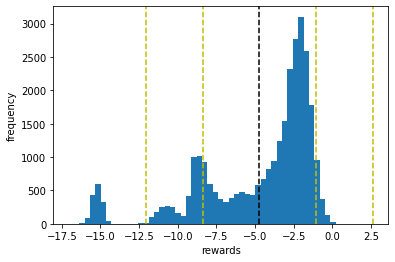

In [7]:
plt.hist(info_car2PPO_episode_1['reward'],bins=50,histtype='stepfilled')
plt.xlabel('rewards')
plt.ylabel('frequency')
m = statistics.mean(info_car2PPO_episode_1['reward'])
sd = statistics.stdev(info_car2PPO_episode_1['reward'])

plt.axvline(m, color='k', linestyle='dashed')
plt.axvline(m+sd, color='y', linestyle='dashed')
plt.axvline(m-sd, color='y', linestyle='dashed')

plt.axvline(m + 2*sd, color='y', linestyle='dashed')
plt.axvline(m - 2*sd, color='y', linestyle='dashed')

plt.show()

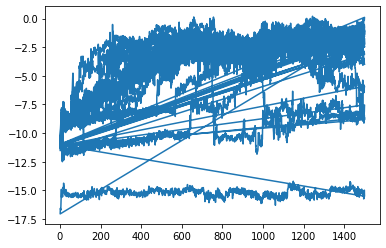

In [8]:
plt.plot(info_car2PPO_episode_1['state'], info_car2PPO_episode_1['reward'])


In [9]:
myMean = info_car2PPO_episode_1['reward'].mean()
myMean

-4.716085131671667

In [10]:
SE = sem(info_car2PPO_episode_1['reward'])
SE

0.02120002620290782

In [11]:
confLevel = 0.95

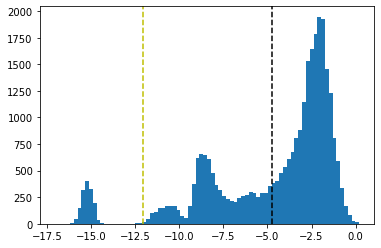

In [12]:
plt.hist(info_car2PPO_episode_1['reward'],bins=80)

m = statistics.mean(info_car2PPO_episode_1['reward'])
sd = statistics.stdev(info_car2PPO_episode_1['reward'])

plt.axvline(m, color='k', linestyle='dashed')
# plt.axvline(m+sd, color='y', linestyle='dashed')
# plt.axvline(m-sd, color='y', linestyle='dashed')

# plt.axvline(m + 2*sd, color='y', linestyle='dashed')
plt.axvline(m - 2*sd, color='y', linestyle='dashed')
Confidence_interval = sd/math.sqrt(3982)
Confidence_interval = Confidence_interval*1.960


plt.show()

In [13]:
print ("Mean : ", m)
print ("Std Deviation : ", sd)
print ("1st Std Interval : ", m-sd , m+sd )
print ("2nd Std Interval : ", m - 2*sd , m + 2*sd )
print ("Confidence Interval : ", Confidence_interval)

print ("Confidence Interval : ", m - Confidence_interval , m + Confidence_interval)


Mean :  -4.716085131671667
Std Deviation :  3.6719522505227844
1st Std Interval :  -8.388037382194451 -1.0441328811488826
2nd Std Interval :  -12.059989632717237 2.627819369373902
Confidence Interval :  0.11405188528324112
Confidence Interval :  -4.830137016954908 -4.602033246388426


In [14]:
t.interval(0.65,info_car2PPO_episode_1['reward'],loc=m, scale=sd)


(array([nan, nan, nan, ..., nan, nan, nan]),
 array([nan, nan, nan, ..., nan, nan, nan]))

<AxesSubplot:xlabel='reward', ylabel='Density'>

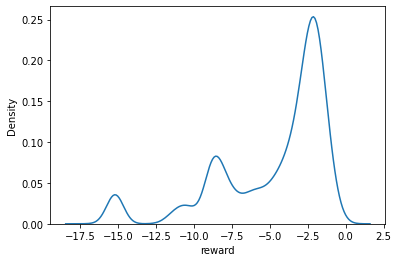

In [15]:
sns.kdeplot(info_car2PPO_episode_1['reward'],)


<AxesSubplot:xlabel='state', ylabel='Density'>

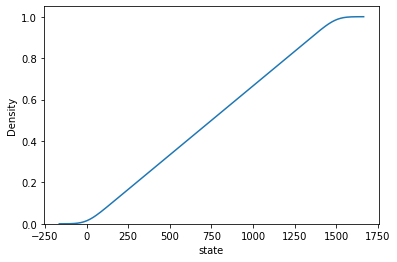

In [16]:
sns.kdeplot(
    data=info_car2PPO_episode_1['reward'], x=info_car2PPO_episode_1['state'],
    cumulative=True, common_norm=False, common_grid=True,
)

<AxesSubplot:xlabel='state', ylabel='reward'>

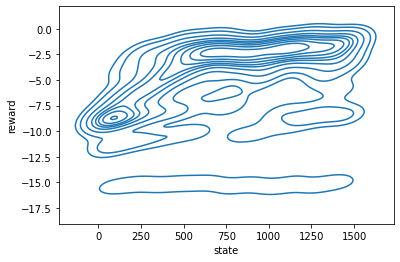

In [17]:
geyser = sns.load_dataset("geyser")
sns.kdeplot(data=info_car2PPO_episode_1, x="state", y="reward")

<AxesSubplot:xlabel='state', ylabel='reward'>

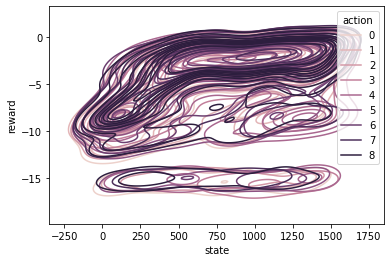

In [15]:
sns.kdeplot(data=info_car2PPO_episode_1, x="state", y="reward", hue="action"
)


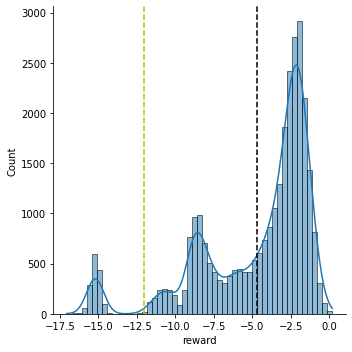

In [16]:
sns.displot(data=info_car2PPO_episode_1, x="reward", kde=True)
plt.axvline(m, color='k', linestyle='dashed')
# plt.axvline(m+sd, color='y', linestyle='dashed')
# plt.axvline(m-sd, color='y', linestyle='dashed')

# plt.axvline(m + 2*sd, color='y', linestyle='dashed')
plt.axvline(m - 2*sd, color='y', linestyle='dashed')

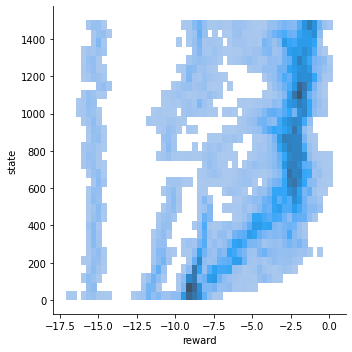

In [18]:
sns.displot(data=info_car2PPO_episode_1, x="reward", y="state")


<AxesSubplot:xlabel='reward', ylabel='state'>

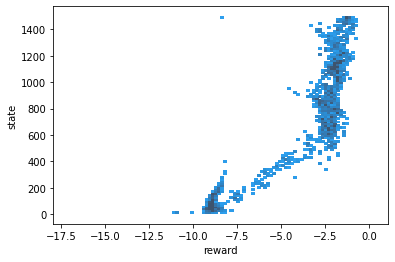

In [39]:
sns.histplot(
    info_car2PPO_episode_1, x="reward", y="state",
    bins=100 ,
    pthresh=.5, pmax=.95,
)

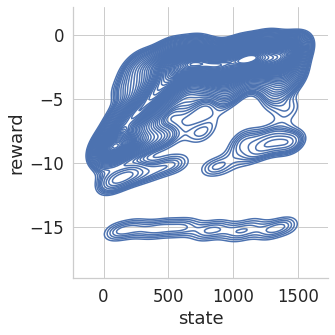

In [255]:
g = sns.displot(data=info_car2PPO_episode_1, x="state", y="reward", kind="kde",levels=50)


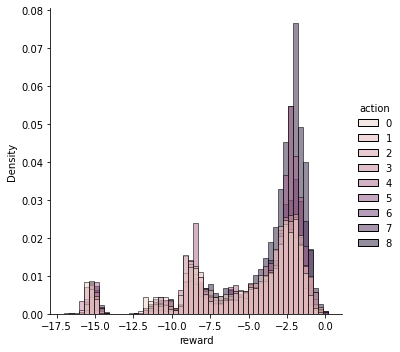

In [20]:

sns.displot(info_car2PPO_episode_1, x="reward", hue="action", stat="density")


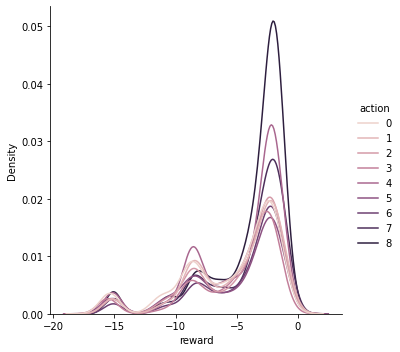

In [21]:
sns.displot(info_car2PPO_episode_1, x="reward", hue="action", kind="kde")


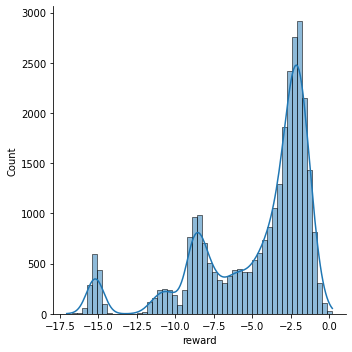

In [22]:
sns.displot(info_car2PPO_episode_1, x="reward", kde=True)


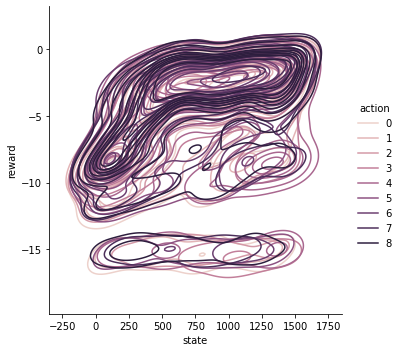

In [23]:
sns.displot(info_car2PPO_episode_1, x="state", y="reward", hue="action", kind="kde")


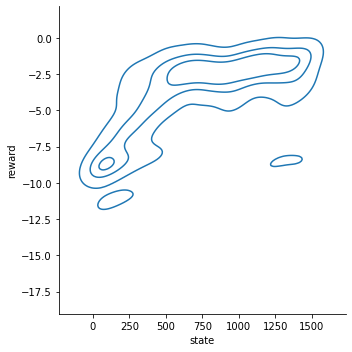

In [24]:
sns.displot(info_car2PPO_episode_1, x="state", y="reward", kind="kde", thresh=.2, levels=4)


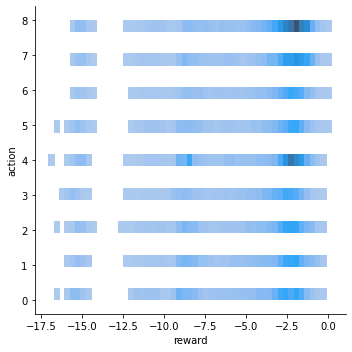

In [25]:
sns.displot(info_car2PPO_episode_1, x="reward", y="action", )


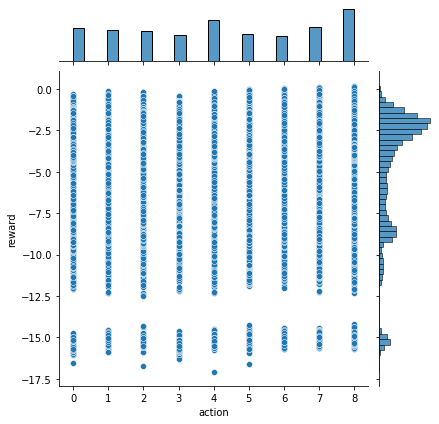

In [26]:
sns.jointplot(data=info_car2PPO_episode_1, x="action", y="reward")


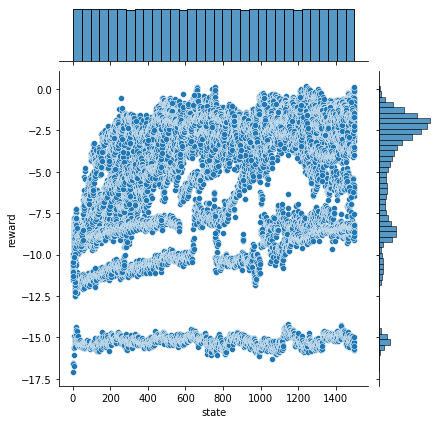

In [27]:
sns.jointplot(data=info_car2PPO_episode_1, x="state", y="reward")


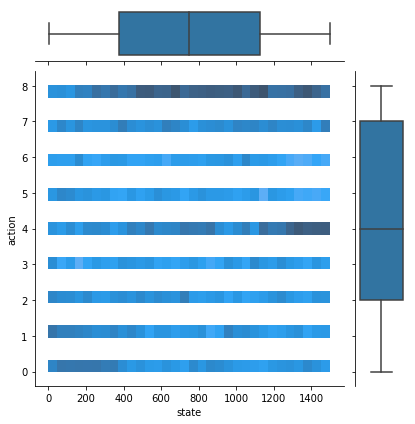

In [16]:
g = sns.JointGrid(data=info_car2PPO_episode_1, x="state", y="action")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

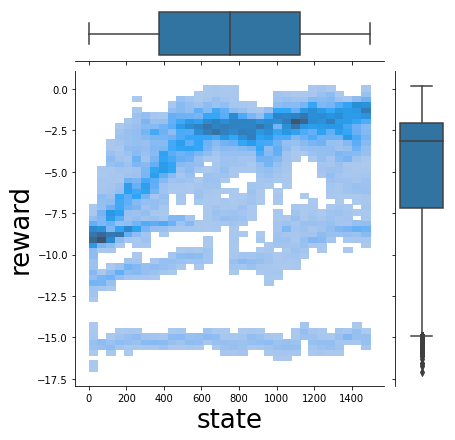

In [120]:

sns.reset_orig()

g = sns.JointGrid(data=info_car2PPO_episode_1, x="state", y="reward",)

g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot, )
g.set_axis_labels('state', 'reward', fontsize=26)



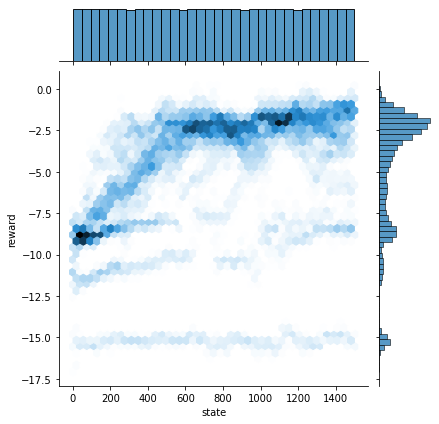

In [118]:
sns.jointplot(data=info_car2PPO_episode_1, x="state", y="reward", kind='hex')


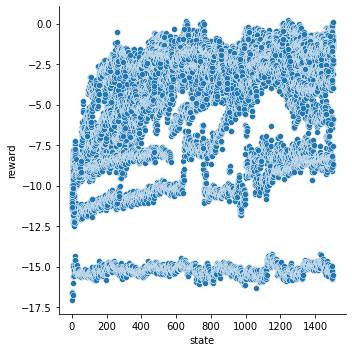

In [30]:
sns.relplot(data=info_car2PPO_episode_1, x="state", y="reward")
# sns.rugplot(data=info_car2PPO_episode_1, x="bill_length_mm", y="bill_depth_mm")

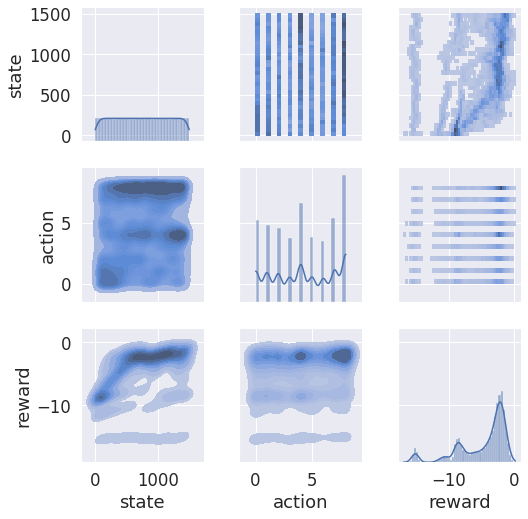

In [16]:
g = sns.PairGrid(info_car2PPO_episode_1)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

/home/aizaz/anaconda3/envs/MAD-ARL/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='reward'>

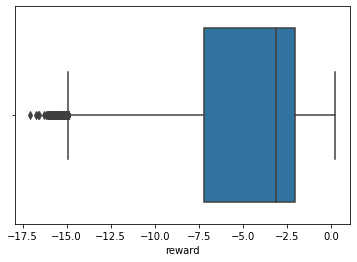

In [ ]:
sns.boxplot(info_car2PPO_episode_1['reward'])


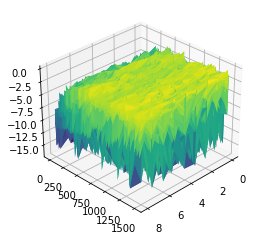

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
 
# Get the data (csv file is hosted on the web)
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/volcano.csv'
data = pd.read_csv(url)
 
# Transform it to a long format
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]
 

 
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(30, 45)

ax.plot_trisurf(info_car2PPO_episode_1['action'], info_car2PPO_episode_1['state'], info_car2PPO_episode_1['reward'], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()
 


In [3]:
# Episode 1

info_car1 = pd.read_json ('/home/aizaz/Desktop/PhD-20210325T090933Z-001/PhD/1_March_2023/Journal_Paper/examples/pre_IRL_anaylysis_straight/info_car1.json', lines=True)

info_car1 = pd.concat([info_car1.drop(['control'], axis=1), info_car1['control'].apply(pd.Series)], axis=1)


In [17]:
info_car1.shape

(30000, 35)

In [18]:
print((info_car1['collision_vehicles']!= 0).values.sum()/30000,"collision_vehicles")
print((info_car1['collision_other']!= 0).values.sum()/30000, "collision_other")
print((info_car1['collision_pedestrians']!= 0).values.sum()/30000, "collision_pedestrian")
print((info_car1['intersection_offroad'] != 0).values.sum()/30000,"intersection_offroad")
print ((info_car1['intersection_otherlane'] != 0).values.sum()/30000, "intersection_otherlane")


0.0 collision_vehicles
0.0 collision_other
0.0 collision_pedestrian
0.0 intersection_offroad
0.0 intersection_otherlane


In [5]:
print (info_car1['collision_vehicles'].idxmax())
print (info_car1['collision_other'].idxmax())
print (info_car1['intersection_offroad'].idxmax())

0
0
0


In [6]:
print (info_car1['collision_vehicles'].idxmax()*0.134)
print (info_car1['collision_other'].idxmax()*0.134)
print (info_car1['intersection_offroad'].idxmax()*0.134)

# 268
# 0.134

0.0
0.0
0.0


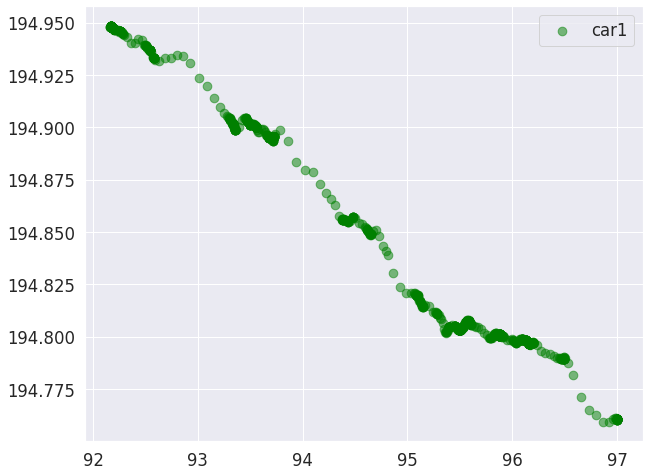

In [324]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)

# ax1.scatter(info_car1['x'][14001:15500], info_car1['y'][14001:15500], s=1, c='g', marker="s", label='car1')
# ax1.scatter(info_car1['x'][15501:16000], info_car1['y'][15501:16000], s=1, c='g', marker="s", label='car1')
ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='car1',alpha =0.5,)


# Text Annotate

# plt.text(84.3, -131.9, "collision", horizontalalignment='left', size='14', color='red', weight='semibold')



plt.legend(loc='upper right')
plt.show()

In [33]:
mean_speed = []
for chunk in np.array_split(info_car1['forward_speed'], 20):
    mean_speed.append(statistics.mean(chunk))
mean_speed

[-0.041297142131020835,
 -0.035737142817915374,
 -0.025748075072303155,
 -0.03489200882607052,
 -0.018241233933510393,
 -0.018740760069704866,
 -0.02517433933554847,
 -0.0483599299610156,
 -0.022729116499095484,
 -0.05920515569645446,
 -0.019226008561468343,
 -0.026414162937474284,
 -0.06519686472915094,
 -0.03758553003195256,
 -0.019024013024187495,
 -0.021489584223551506,
 -0.026606055653449697,
 -0.021953660800624115,
 -0.02236580354188576,
 -0.03173031522382391]

/home/aizaz/anaconda3/envs/MAD-ARL/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

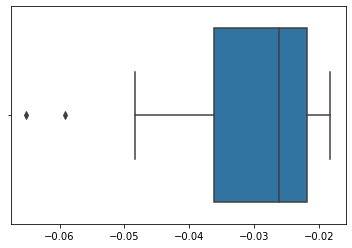

In [34]:
sns.boxplot(mean_speed)


In [35]:
mean_distance = []
for chunk in np.array_split(info_car1['distance_to_goal_euclidean'], 20):
    mean_distance.append(statistics.mean(chunk))

mean_distance

[122.04020439375077,
 122.02870285174613,
 121.10589366693063,
 121.68932668576261,
 120.94349827004349,
 121.31141408374124,
 121.34140852892507,
 122.13240249943871,
 121.51396792715576,
 122.57848128372743,
 121.47457173022782,
 121.48921288847437,
 123.25725818316332,
 121.72902300565,
 121.24925195499648,
 121.44983636192691,
 121.60406159490753,
 121.16242967425586,
 121.04955138979021,
 122.15207577342396]

/home/aizaz/anaconda3/envs/MAD-ARL/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

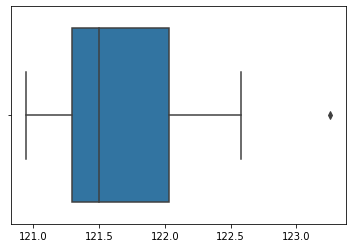

In [36]:
sns.boxplot(mean_distance)


## Only for Paper Visualization

### RQ1

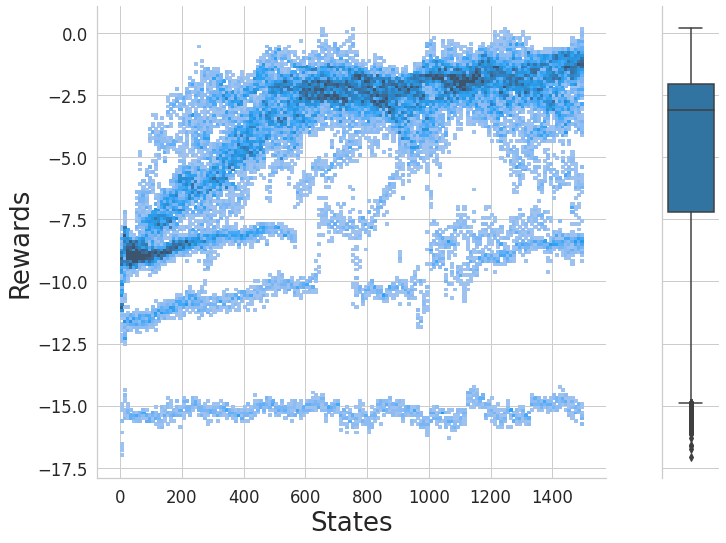

In [8]:
sns.reset_orig()

color = sns.color_palette()

sns.set(font_scale = 1.5)
sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})
sns.set_style("whitegrid")

joint = sns.JointGrid(data=info_car2PPO_episode_1, x="state", y="reward")

joint.plot_joint(sns.histplot,color=color[0],bins=150, pmax=.95,)
joint.plot_marginals(sns.boxplot, 
                     color=color[0])

joint.fig.tight_layout()

# plt.legend(loc='lower right')
joint.fig.set_figwidth(12)
joint.fig.set_figheight(10)

joint.ax_marg_x.remove()

joint.set_axis_labels('States','Rewards',fontsize=26)

plt.tick_params(axis='both', which='major', labelsize=34)

# plt.tick_params(labelsize=16)
plt.savefig("RQ1_straight_1.pdf")


In [164]:
print(sns.color_palette("pastel6").as_hex())


['#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff', '#fffea3', '#b9f2f0']


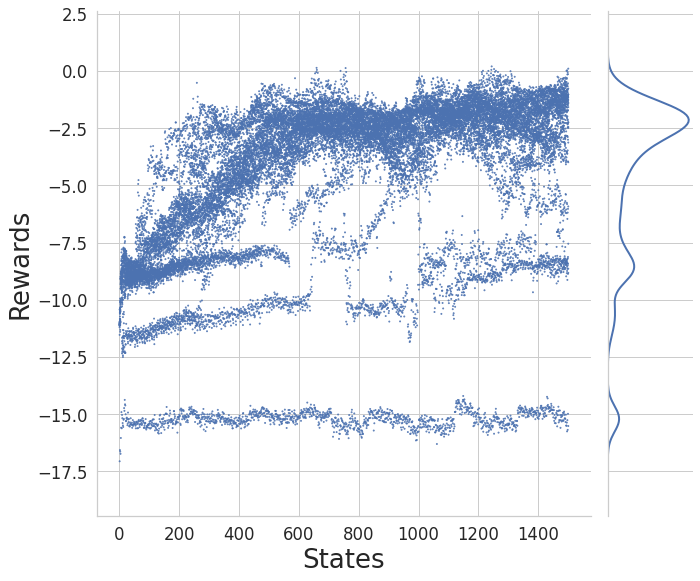

In [19]:
sns.reset_orig()
sns.set(font_scale = 1.5)
color = sns.color_palette()

sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})
sns.set_style("whitegrid")

my_palette = sns.color_palette("pastel")


g = sns.JointGrid()
x, y = info_car2PPO_episode_1["state"], info_car2PPO_episode_1["reward"]
sns.scatterplot(x=x, y=y, ec="b", fc="none", s=0.5, linewidth=1.2, ax=g.ax_joint,palette=my_palette)
# sns.histplot(x=x, fill=False, linewidth=1, ax=g.ax_marg_x)
sns.kdeplot(y=y, linewidth=2, ax=g.ax_marg_y,palette=my_palette)



g.fig.set_figwidth(10)
g.fig.set_figheight(10)

# joint.fig.tight_layout()

g.ax_marg_x.remove()

g.set_axis_labels('States','Rewards',fontsize=26)
plt.tick_params(labelsize=32)
plt.savefig("RQ1_straight_2.jpg", bbox_inches = "tight")


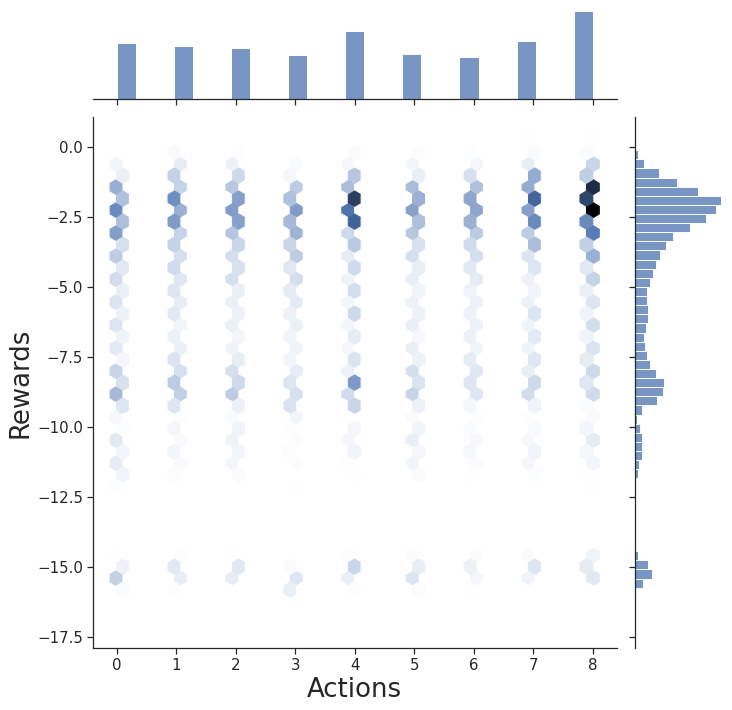

In [20]:



sns.reset_orig()
plt.rcParams["figure.figsize"] = (5,10)

sns.set(font_scale = 1.36)
# sns.set_context("talk")

sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})
sns.set_style("ticks")
# sns.set_style("whitegrid")

plot = sns.jointplot(data=info_car2PPO_episode_1, x="action", y="reward",height=10, kind="hex")

# g.set_axis_labels('States','Rewards',fontsize=26)

plot.set_axis_labels('Actions','Rewards',fontsize=26)
# plot.set_xlabel('Act',fontsize=26)


plt.savefig("RQ1_straight_3.jpg", bbox_inches = "tight")


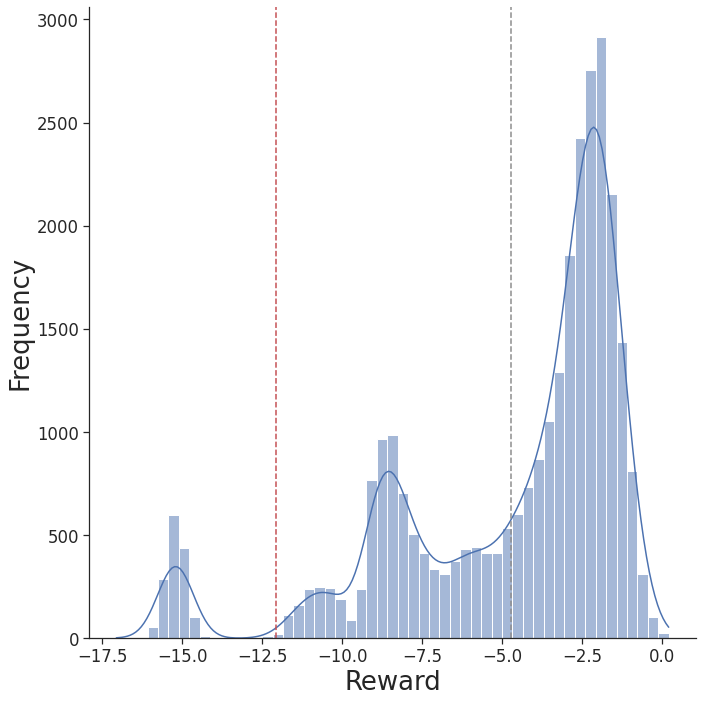

In [21]:

sns.reset_orig()
sns.set(font_scale = 1.5)

color = sns.color_palette()

sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})
sns.set_style("ticks")
# sns.set_style("whitegrid")



plot =  sns.displot(data=info_car2PPO_episode_1, x="reward", kde=True,height=10,color=color[0])
plt.axvline(m, color=color[7], linestyle='dashed')
# plt.axvline(m+sd, color='y', linestyle='dashed')
# plt.axvline(m-sd, color='y', linestyle='dashed')

# plt.axvline(m + 2*sd, color='y', linestyle='dashed')
plt.axvline(m - 2*sd, color=color[3], linestyle='dashed')
plot.set_axis_labels('Reward','Frequency',fontsize=26)
plt.savefig("RQ1_straight_4.jpg", bbox_inches = "tight")


### RQ3

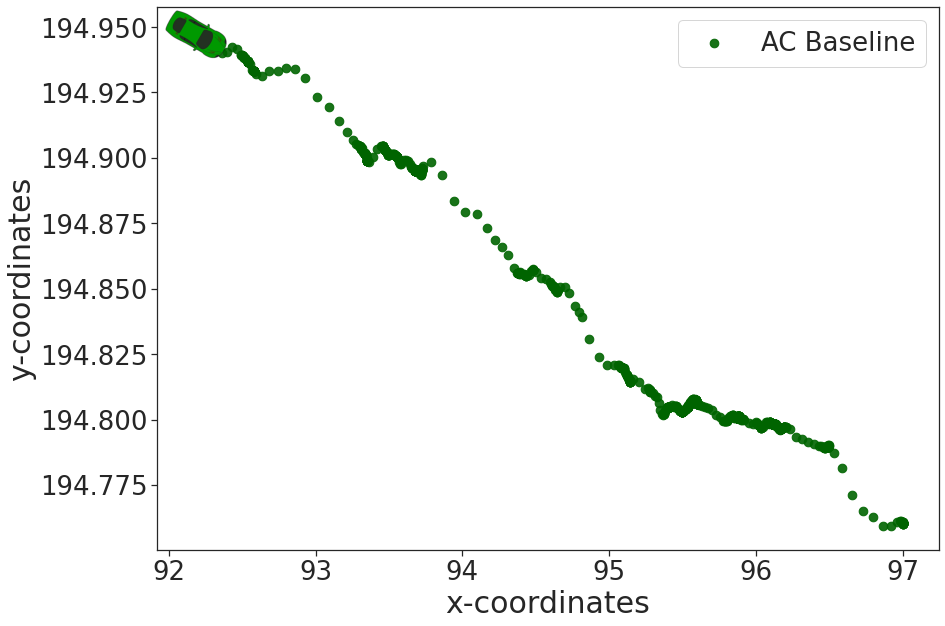

In [22]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='darkgreen', marker=".", label='AC Baseline',alpha =0.9,)

plt.legend(loc='upper right', fontsize=26)
plt.xlabel('x-coordinates', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.ylabel('y-coordinates', fontsize=30)

im = Image.open('image_1-removebg-preview.png')
newax = fig.add_axes([0.13, 0.8, 0.08, 0.08], anchor='NW', zorder=1)
newax.imshow(im)
newax.axis('off')



plt.savefig("RQ3_straight_1.jpg", bbox_inches = "tight")


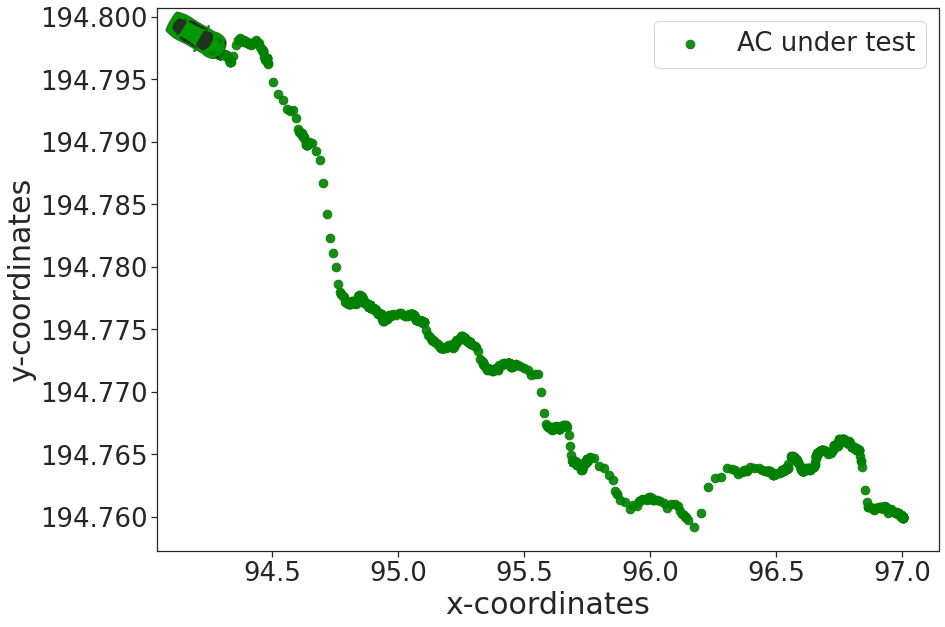

In [23]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



ax1.scatter(info_car1['x'][19501:21000], info_car1['y'][19501:21000], s=300, c='green', marker=".", label='AC under test',alpha =0.9,)



plt.legend(loc='upper right', fontsize=26)
plt.xlabel('x-coordinates', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.ylabel('y-coordinates', fontsize=30)

im = Image.open('image_1-removebg-preview.png')
newax = fig.add_axes([0.13, 0.8, 0.08, 0.08], anchor='NW', zorder=1)
newax.imshow(im)
newax.axis('off')
plt.savefig("RQ3_straight_2.jpg",bbox_inches = "tight")


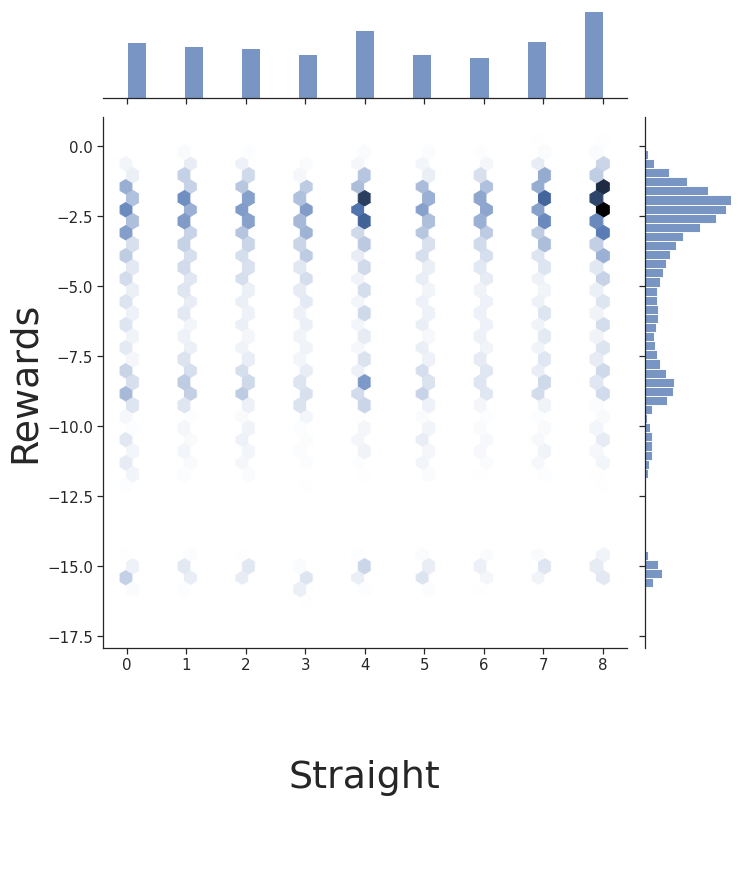

In [4]:
sns.reset_orig()
plt.rcParams["figure.figsize"] = (5,10)

sns.set(font_scale = 1.36)
# sns.set_context("talk")

sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})
sns.set_style("ticks")
# sns.set_style("whitegrid")

plot = sns.jointplot(data=info_car2PPO_episode_1, x="action", y="reward",height=10, kind="hex")

# g.set_axis_labels('States','Rewards',fontsize=26)

# plot.set_axis_labels('\n\n(a) Straight\n\n','Rewards',fontsize=38)
plot.set_axis_labels('\n\nStraight\n\n','Rewards',fontsize=38)

# plot.set_xlabel('Act',fontsize=26)


plt.savefig("Straight.pdf",dpi=300, bbox_inches = "tight")

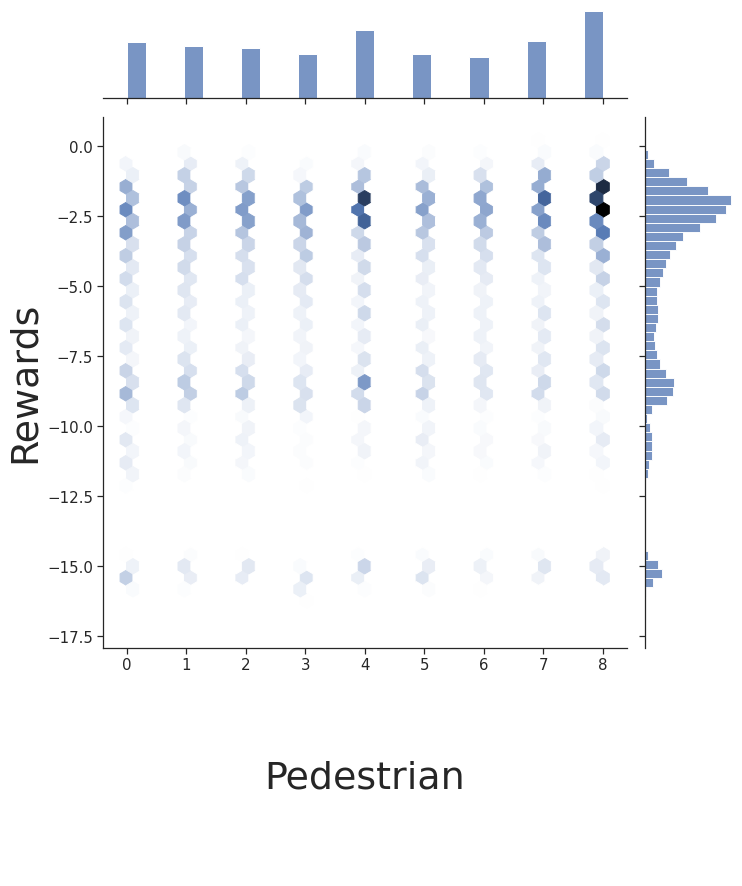

In [5]:
sns.reset_orig()
plt.rcParams["figure.figsize"] = (5,10)

sns.set(font_scale = 1.36)
# sns.set_context("talk")

sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})
sns.set_style("ticks")
# sns.set_style("whitegrid")

plot = sns.jointplot(data=info_car2PPO_episode_1, x="action", y="reward",height=10, kind="hex")

# g.set_axis_labels('States','Rewards',fontsize=26)

# plot.set_axis_labels('\n\n(b) Pedestrian\n\n','Rewards',fontsize=38)
plot.set_axis_labels('\n\nPedestrian\n\n','Rewards',fontsize=38)

# plot.set_xlabel('Act',fontsize=26)


plt.savefig("Pedestrian.pdf",dpi=300, bbox_inches = "tight")

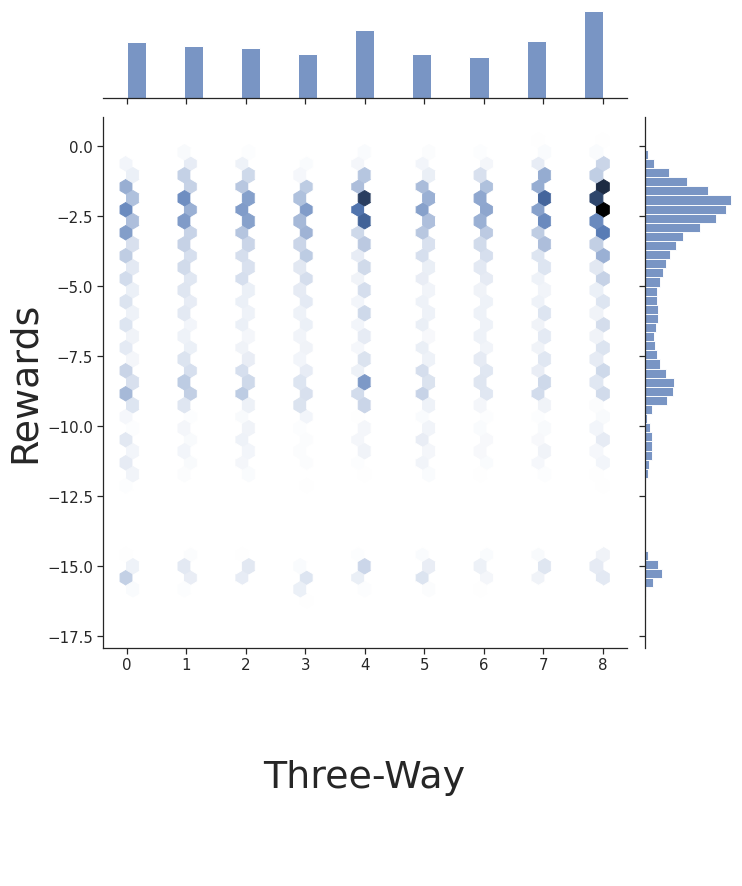

In [6]:
sns.reset_orig()
plt.rcParams["figure.figsize"] = (5,10)

sns.set(font_scale = 1.36)
# sns.set_context("talk")

sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})
sns.set_style("ticks")
# sns.set_style("whitegrid")

plot = sns.jointplot(data=info_car2PPO_episode_1, x="action", y="reward",height=10, kind="hex")

# g.set_axis_labels('States','Rewards',fontsize=26)

# plot.set_axis_labels('\n\n(c) Three-Way\n\n','Rewards',fontsize=38)
plot.set_axis_labels('\n\nThree-Way\n\n','Rewards',fontsize=38)

# plot.set_xlabel('Act',fontsize=26)


plt.savefig("Three Way.pdf",dpi=300, bbox_inches = "tight")